In [1]:
# Random Forest - Problem Statement:
#A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
#Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [3]:
# import data to play with
company= pd.read_csv('Company_Data.csv')

In [4]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


In [5]:
#First convert target column Sales into Categorical column into categories Low, Medium and High.

company['Sales'] = pd.cut(x=company['Sales'],bins=[0, 6, 12, 17], labels=['Low','Medium', 'High'], right = False)
company['Sales']

0      Medium
1      Medium
2      Medium
3      Medium
4         Low
        ...  
395      High
396    Medium
397    Medium
398       Low
399    Medium
Name: Sales, Length: 400, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [6]:
#Check the value counts

company['Sales'].value_counts()

Medium    243
Low       130
High       27
Name: Sales, dtype: int64

In [7]:
# Converting other column data/attributes into categories

company['CompPrice'] = pd.cut(x=company['CompPrice'],bins=[76, 100, 134, 178], labels=['Low','Medium', 'High'], right = False)

company['Income'] = pd.cut(x=company['Income'],bins=[20, 45, 75, 122], labels=['Low','Medium', 'High'], right = False)

company['Advertising'] = pd.cut(x=company['Advertising'],bins=[0, 10, 20, 30], labels=['Low','Medium', 'High'], right = False)

company['Population'] = pd.cut(x=company['Population'],bins=[10, 165, 330, 520], labels=['Low','Medium', 'High'], right = False)

company['Price'] = pd.cut(x=company['Price'],bins=[24, 80, 140, 195], labels=['Low','Medium', 'High'], right = False)

company['Age'] = pd.cut(x=company['Age'],bins=[25, 45, 60, 81], labels=['Low','Medium', 'High'], right = False)

company['Education'] = pd.cut(x=company['Education'],bins=[10, 12.5, 15, 19], labels=['Low','Medium', 'High'], right = False)

In [8]:
company.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,Medium,High,Medium,Medium,Medium,Medium,Bad,Low,High,Yes,Yes
1,Medium,Medium,Medium,Medium,Medium,Medium,Good,High,Low,Yes,Yes
2,Medium,Medium,Low,Medium,Medium,Medium,Medium,Medium,Low,Yes,Yes
3,Medium,Medium,High,Low,High,Medium,Medium,Medium,Medium,Yes,Yes
4,Low,High,Medium,Low,High,Medium,Bad,Low,Medium,Yes,No


In [9]:
# Convert categorical value into numeric column --> Use encoding categorical data
label_encoder = preprocessing.LabelEncoder()

company['Sales'] = label_encoder.fit_transform(company['Sales'])
company['CompPrice'] = label_encoder.fit_transform(company['CompPrice'])
company['Income'] = label_encoder.fit_transform(company['Income'])
company['Advertising'] = label_encoder.fit_transform(company['Advertising'])
company['Population'] = label_encoder.fit_transform(company['Population'])
company['Price'] = label_encoder.fit_transform(company['Price'])
company['ShelveLoc'] = label_encoder.fit_transform(company['ShelveLoc'])
company['Age'] = label_encoder.fit_transform(company['Age'])
company['Education'] = label_encoder.fit_transform(company['Education'])
company['Urban'] = label_encoder.fit_transform(company['Urban'])
company['US'] = label_encoder.fit_transform(company['US'])

In [10]:
#Print converted data for analtsis
company

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,2,0,2,2,2,2,0,1,0,1,1
1,2,2,2,2,2,2,1,0,1,1,1
2,2,2,1,2,2,2,2,2,1,1,1
3,2,2,0,1,0,2,2,2,2,1,1
4,1,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,0,0,0,2,2,2,1,1,2,1,1
396,2,0,1,1,1,2,2,2,1,0,1
397,2,0,1,2,0,0,2,1,0,1,1
398,1,2,0,1,2,2,0,2,1,1,1


In [11]:
# Dividing data into independent variables and dependent variable
X = company.drop('Sales', axis = 1)
y = company['Sales']

In [12]:
X

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,0,2,2,2,2,0,1,0,1,1
1,2,2,2,2,2,1,0,1,1,1
2,2,1,2,2,2,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
4,0,2,1,0,2,0,1,2,1,0
...,...,...,...,...,...,...,...,...,...,...
395,0,0,2,2,2,1,1,2,1,1
396,0,1,1,1,2,2,2,1,0,1
397,0,1,2,0,0,2,1,0,1,1
398,2,0,1,2,2,0,2,1,1,1


In [13]:

y

0      2
1      2
2      2
3      2
4      1
      ..
395    0
396    2
397    2
398    1
399    2
Name: Sales, Length: 400, dtype: int32

In [14]:
# Random Forest Classification

num_trees = 500
max_features = 3
kfold = KFold(n_splits=10, random_state=None,shuffle=True)
model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
results = cross_val_score(model1, X, y, cv=kfold)
print(results.mean())

0.6625


In [15]:
model1.fit(X,y)

RandomForestClassifier(max_features=3, n_estimators=500)

In [16]:
model1.predict(X)

array([2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0,
       1, 1, 2, 0, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1,
       2, 2, 0, 2, 2, 2, 1, 0, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 2,
       2, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 1, 1, 2, 1, 1, 2, 1, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2,
       2, 2, 1, 2, 1, 2, 2, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 0, 2, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2,
       1, 2, 2, 2, 1, 2, 1, 1, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 2, 0, 2, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 2, 2, 1, 2, 2, 2, 1, 2, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 2, 1, 2, 2, 2,

In [17]:
# Decision Tree

In [18]:
# Splitting data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.33, random_state= 40)

In [19]:
# Print X & Y -> train  & test data

In [20]:
x_train

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
290,2,0,2,0,2,2,1,1,0,1
336,0,1,1,1,0,0,1,0,1,0
212,0,2,2,0,2,2,2,1,1,1
296,2,1,2,1,2,1,0,0,1,1
10,2,0,1,1,2,0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
306,2,1,1,1,2,2,2,1,1,1
165,0,2,1,1,0,0,1,0,1,1
7,0,0,2,0,2,1,0,1,1,1
219,2,0,2,0,2,1,2,0,1,1


In [21]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,2,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1
314,2,1,2,0,2,1,0,2,1,1
259,2,1,2,0,2,0,0,1,0,1
49,0,0,1,1,0,1,1,0,1,0


In [22]:
y_train

290    2
336    1
212    0
296    2
10     2
      ..
306    1
165    1
7      2
219    2
326    1
Name: Sales, Length: 268, dtype: int32

In [23]:
x_test

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
132,2,0,1,2,2,1,0,1,1,1
390,2,0,1,1,2,2,0,1,1,1
310,0,2,0,0,0,2,2,1,1,1
3,2,0,1,0,2,2,2,2,1,1
248,2,2,1,1,2,2,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...
215,2,0,2,2,0,0,0,1,1,1
314,2,1,2,0,2,1,0,2,1,1
259,2,1,2,0,2,0,0,1,0,1
49,0,0,1,1,0,1,1,0,1,0


In [24]:
#Building model based on C5.0 Algorithm
#Building Decision Tree Classifier using Entropy Criteria

In [25]:
model_c5 = DecisionTreeClassifier(criterion = 'entropy', max_depth= 3)
model_c5.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3)

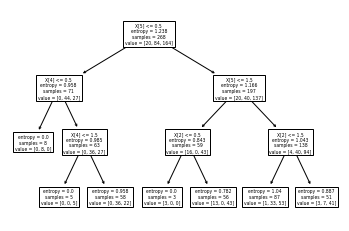

In [26]:
# Plotting Decision tree
tree.plot_tree(model_c5);

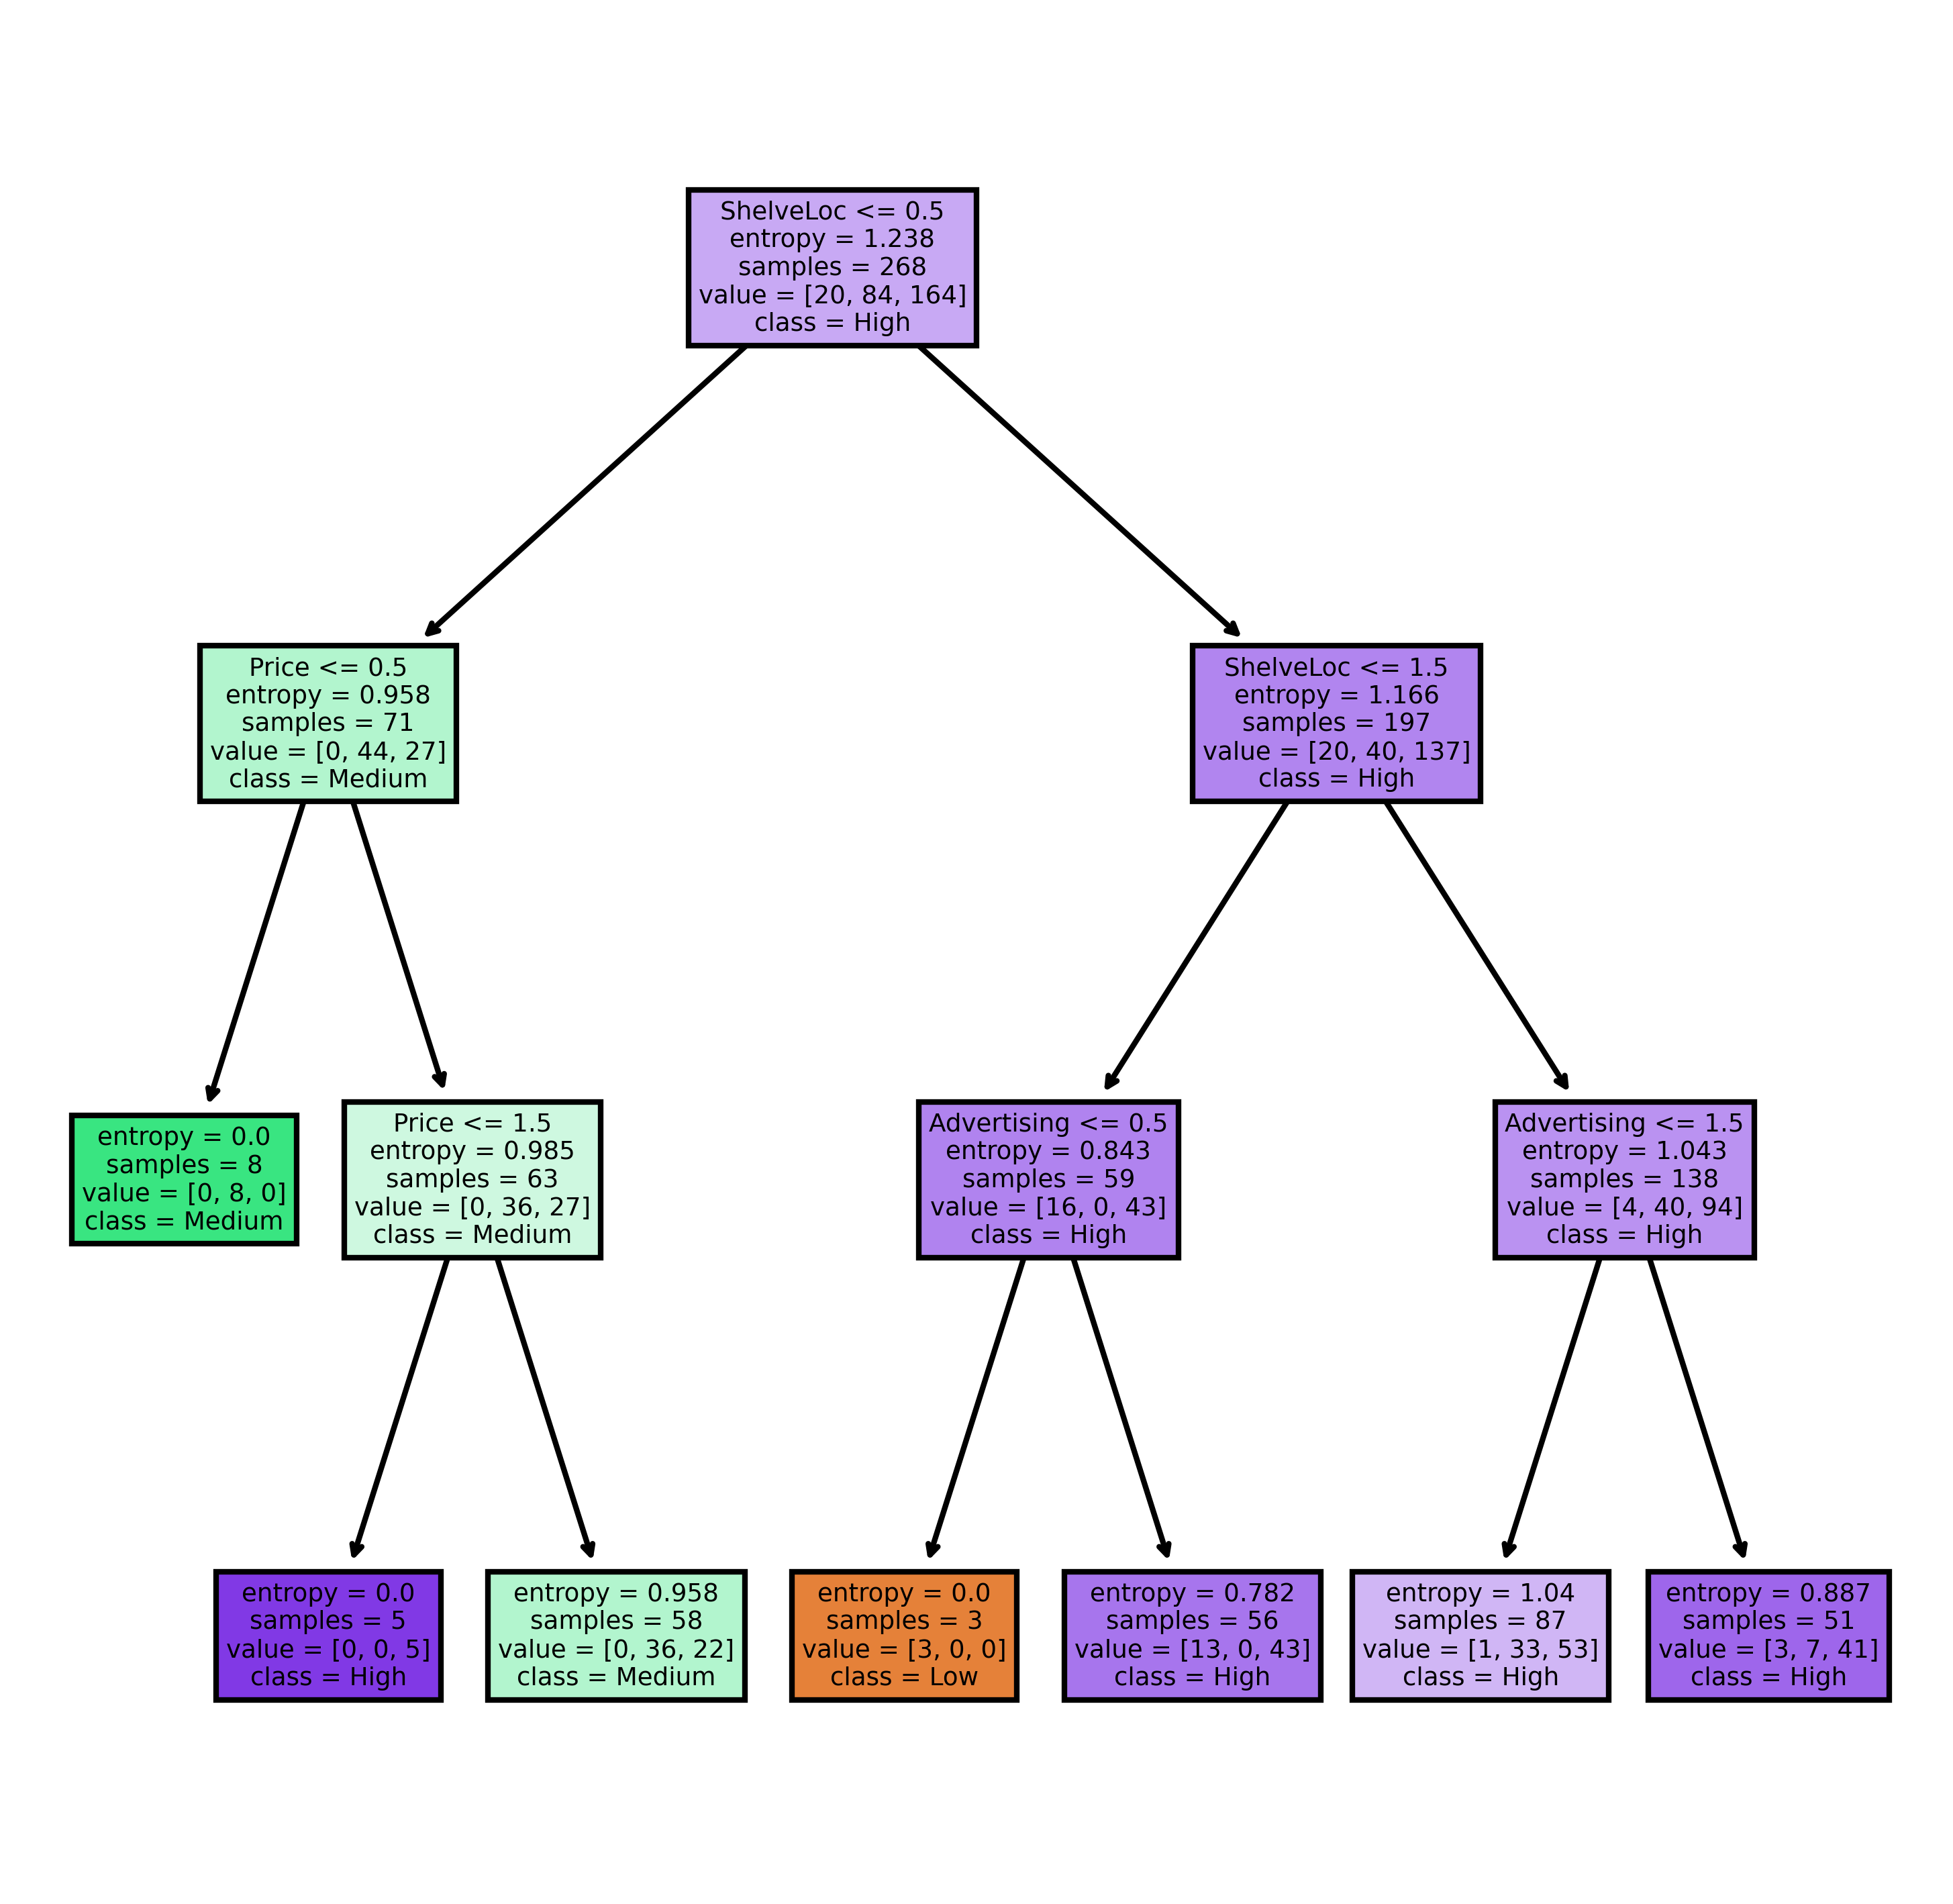

In [27]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_c5,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [28]:
# Predicting Data
preds = model_c5.predict(x_test)
pd.Series(preds).value_counts()

2    107
1     24
0      1
dtype: int64

In [29]:
preds

array([2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [30]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,16,30
2,1,8,70


In [31]:
# Checking accuracy of model
model_c5.score(x_test, y_test)

0.6515151515151515

In [32]:
#Building Decision Tree Classifier (CART) using Gini Criteria

In [33]:
model_CART = DecisionTreeClassifier(criterion = 'gini', max_depth= 3)
model_CART.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3)

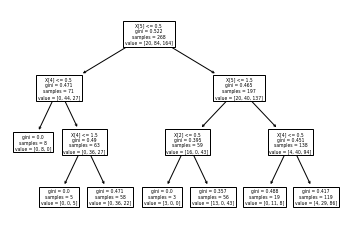

In [34]:
# Plotting Decision tree
tree.plot_tree(model_CART);

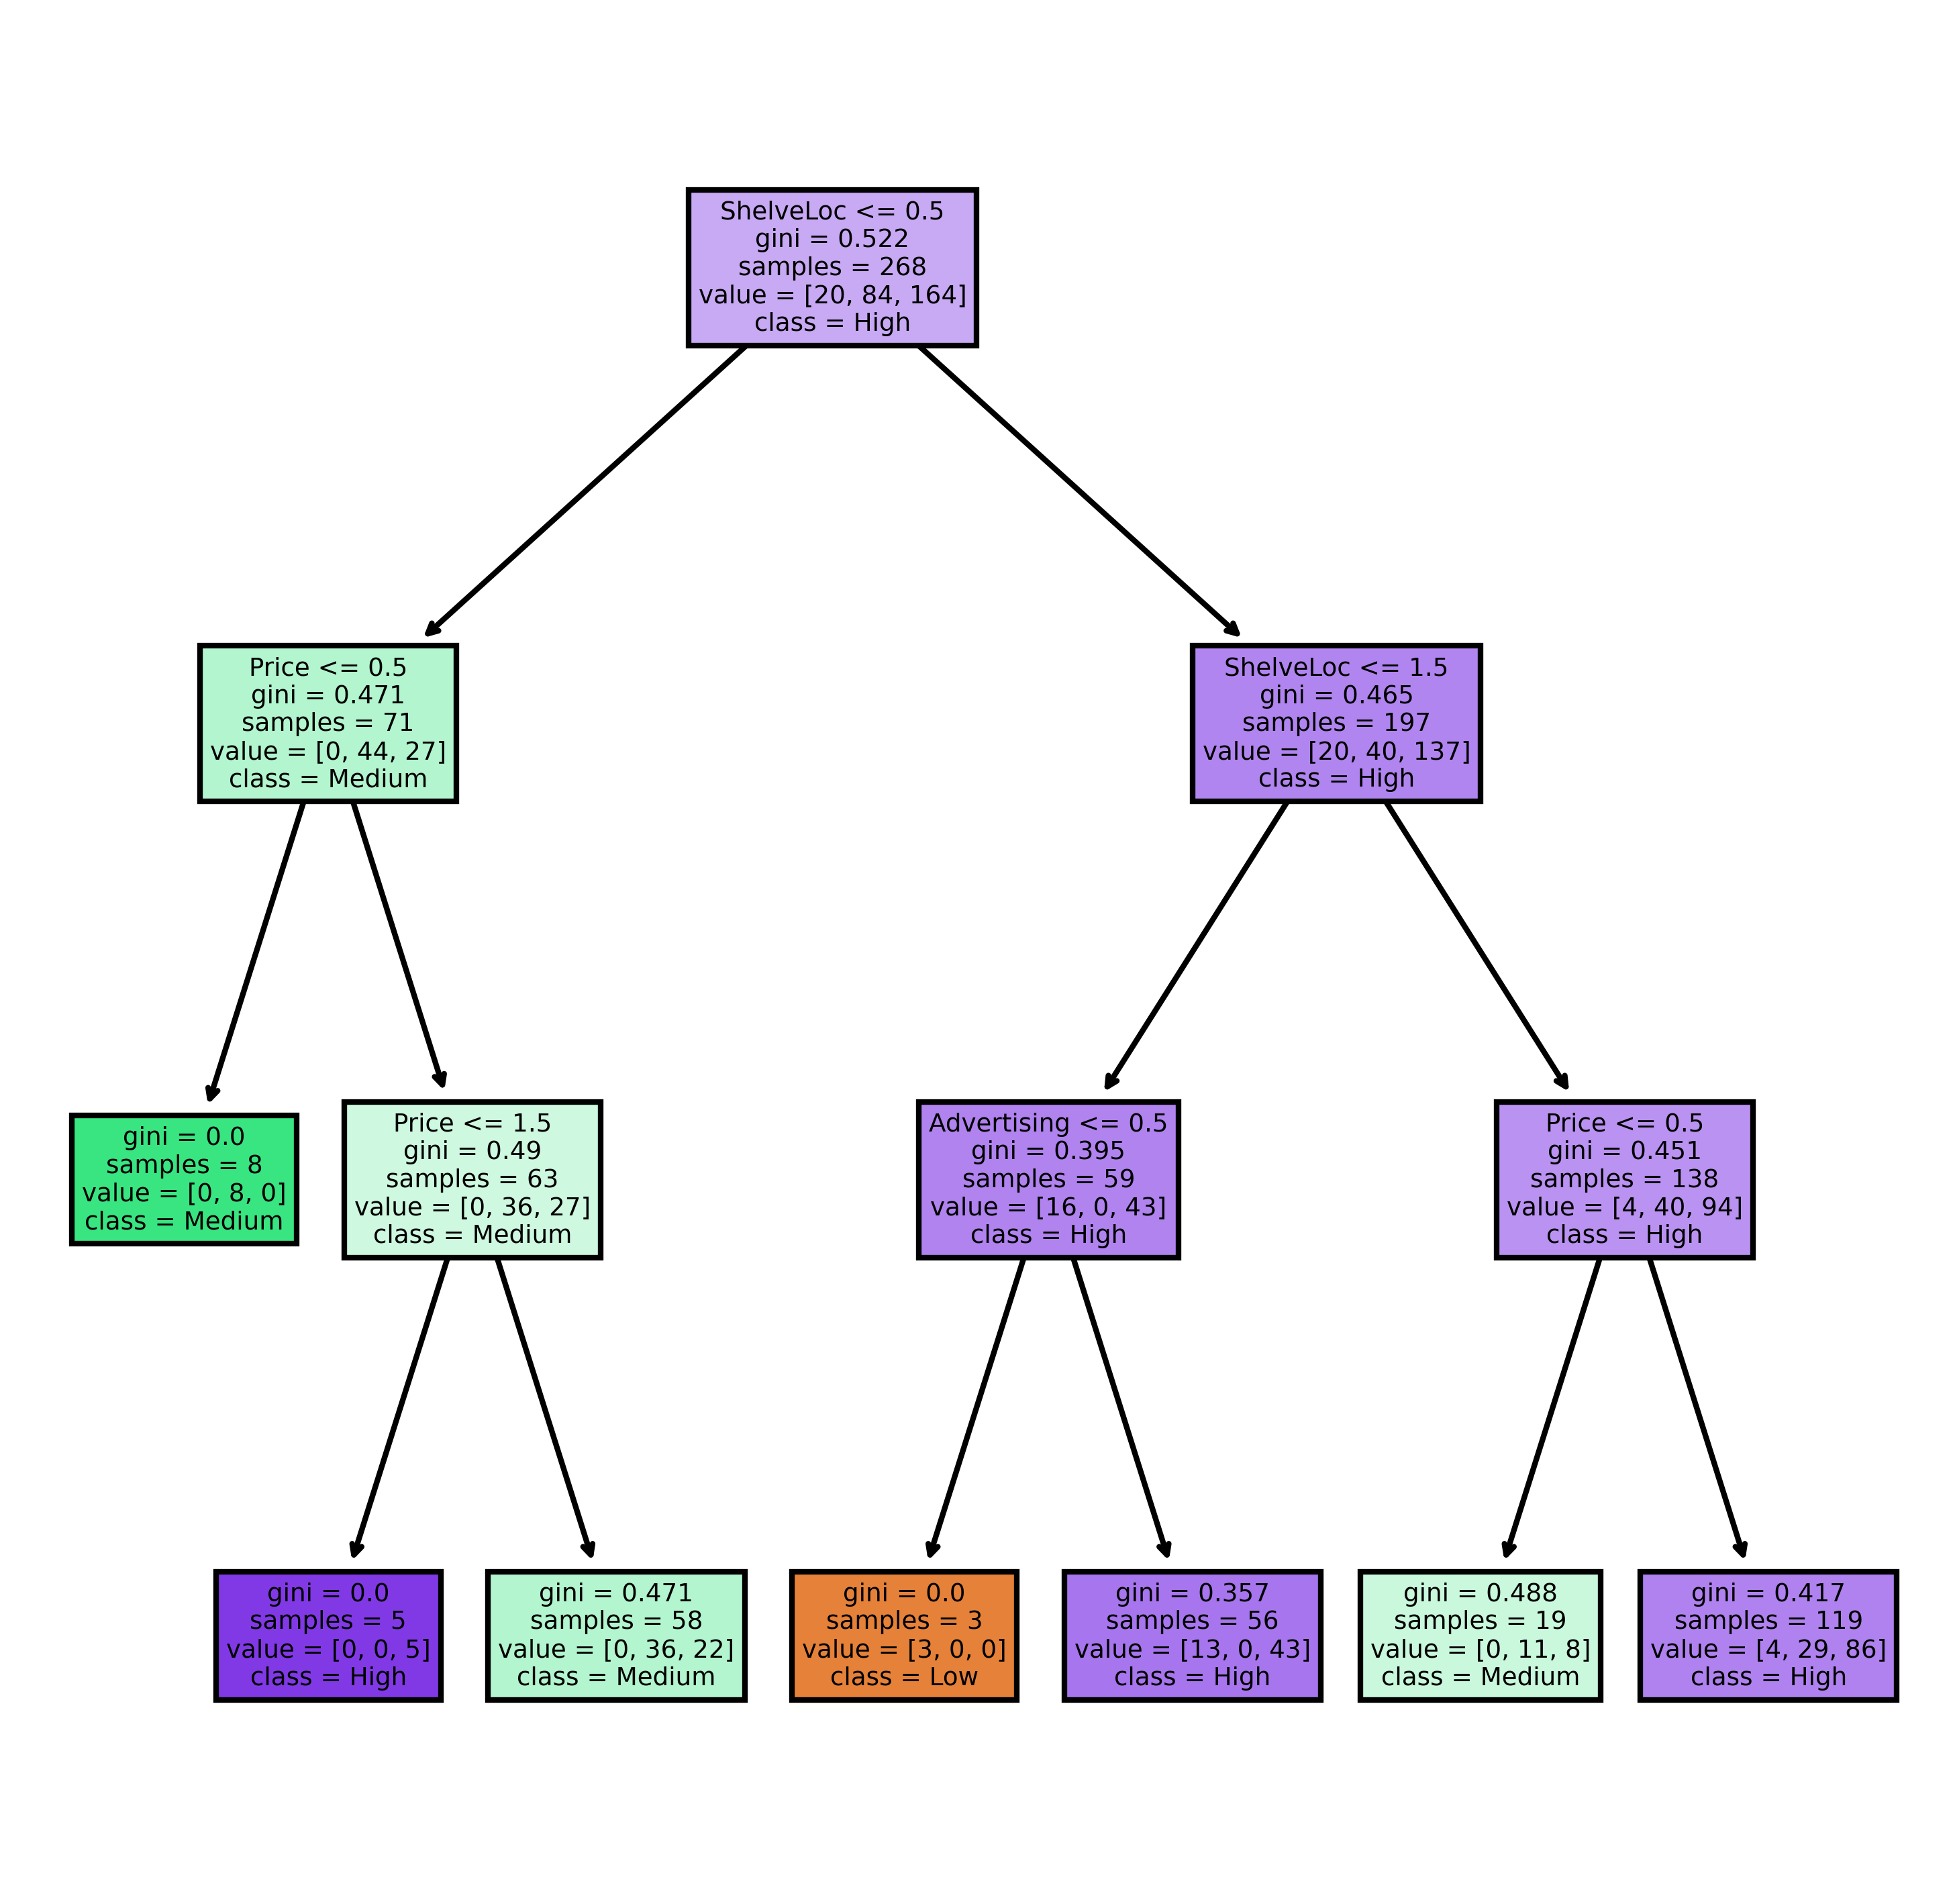

In [35]:
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low', 'Medium', 'High']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)
tree.plot_tree(model_CART,
               feature_names = fn, 
               class_names=cn,
               filled = True);

In [36]:
# Predicting Data
preds1 = model_CART.predict(x_test)
pd.Series(preds).value_counts()

2    107
1     24
0      1
dtype: int64

In [37]:
preds1

array([2, 2, 1, 2, 2, 1, 0, 2, 2, 2, 2, 2, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2,
       2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2,
       2, 1, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2,
       2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       1, 2, 1, 1, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1,
       2, 2, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2])

In [38]:
# Creating cross tables for checking model
pd.crosstab(y_test, preds1)

col_0,0,1,2
Sales,,,
0,0,0,7
1,0,24,22
2,1,10,68


In [39]:
# Checking accuracy of model
model_CART.score(x_test, y_test)

0.696969696969697

In [40]:
# Bagged Decision Trees for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
filename = 'Company_Data.csv'
X = company.drop('Sales', axis = 1)
y = company['Sales']

kfold1 = KFold(n_splits=10, random_state=None,shuffle=True)
cart = DecisionTreeClassifier()
num_trees = 100
model2 = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=None)
results2 = cross_val_score(model2, X, y, cv=kfold1)
print(results2.mean())

0.65


In [41]:
# AdaBoost Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier

fraud=pd.read_csv('Fraud_check.csv')
X = company.drop('Sales', axis = 1)
y = company['Sales']

num_trees = 8
seed=7
kfold2= KFold(n_splits=8,random_state=None,shuffle=True)
model3= AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
results3 = cross_val_score(model3, X, y, cv=kfold2)
print(results3.mean())

0.595


In [42]:
# Stacking Ensemble for Classification
from pandas import read_csv
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

filename = 'Company_Data.csv'
X = company.drop('Sales', axis = 1)
y = company['Sales']

kfold3= KFold(n_splits=10, random_state=None,shuffle=True)

# create the sub models
estimators = []
model4 = LogisticRegression(max_iter=500)
estimators.append(('logistic', model4))
model5 = DecisionTreeClassifier()
estimators.append(('cart', model5))
model6 = SVC()
estimators.append(('svm', model6))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = cross_val_score(ensemble, X,y, cv=kfold3)
print(results.mean())

0.6575
